<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%EB%B2%94%EC%A3%BC%ED%99%94_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자료의 형태

* 통계관련 분석 방법은 자료의 형태에 의해 결정

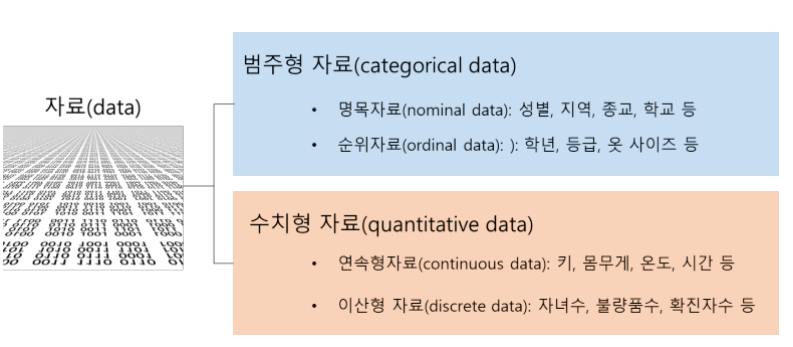






#### 코드(codes)의 범주화(Cotegorical): Categorical.from_codes(codes, levels)

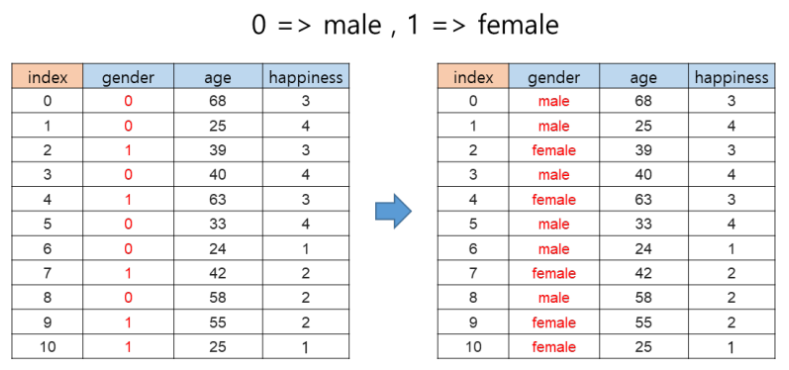

In [ ]:
print("Hello, world!")

Hello, world!


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"gender": np.random.randint(0, 2, size=11),
                   "age": np.random.randint(20, 70, size=11),
                   'happiness': np.random.randint(0, 5, size=11)})
df



,gender,age,happiness
0,0,55,1
1,0,22,1
2,0,66,1
3,0,30,3
4,0,39,0
5,1,47,0
6,0,20,1
7,1,46,2
8,1,20,2
9,1,46,4


In [ ]:
gender_lv = ['male', 'female']
df["gender"] = pd.Categorical.from_codes(df["gender"], gender_lv)
df

,gender,age,happiness
0,male,55,1
1,male,22,1
2,male,66,1
3,male,30,3
4,male,39,0
5,female,47,0
6,male,20,1
7,female,46,2
8,female,20,2
9,female,46,4


In [ ]:
df.loc[df['happiness'] == 0 or 1, 'happiness'] = 0
df.loc[df['happiness'] == 2, 'happiness'] = 1
df.loc[df['happiness'] == 3 or 4, 'happiness'] = 2

df

ValueError: ignored

In [ ]:
happy_lv = ['very unhappy', 'unhappy', 'soso', 'happy', 'very happy']
df["happiness"]=pd.Categorical.from_codes(df["happiness"], happy_lv, ordered = True)
df["happiness"]


0          unhappy
1          unhappy
2          unhappy
3            happy
4     very unhappy
5     very unhappy
6          unhappy
7             soso
8             soso
9       very happy
10           happy
Name: happiness, dtype: category
Categories (5, object): ['very unhappy' < 'unhappy' < 'soso' < 'happy' < 'very happy']

In [ ]:
df

,gender,age,happiness
0,male,55,unhappy
1,male,22,unhappy
2,male,66,unhappy
3,male,30,happy
4,male,39,very unhappy
5,female,47,very unhappy
6,male,20,unhappy
7,female,46,soso
8,female,20,soso
9,female,46,very happy


In [ ]:
df.loc[df['happiness'] == 'very unhappy' or 'unhappy', 'happiness'] = 'unhappy'
df.loc[df['happiness'] == 2, 'happiness'] = 1
df.loc[df['happiness'] == 3 or 4, 'happiness'] = 2

df

#### 수치형(quantitavie) 자료, 동일 구간으로 범주화(Cotegorical): cut()

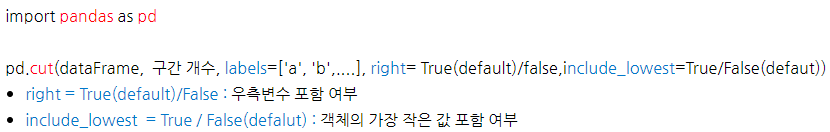![image.png]()



*  3개의 같은 구간으로 age를 범주화



In [ ]:
df['age_cat'] = pd.cut(df['age'], 3)
df


,gender,age,happiness,age_cat
0,1,69,unhappy,"(53.333, 69.0]"
1,1,22,soso,"(21.953, 37.667]"
2,1,28,unhappy,"(21.953, 37.667]"
3,1,46,soso,"(37.667, 53.333]"
4,0,26,soso,"(21.953, 37.667]"
5,0,63,soso,"(53.333, 69.0]"
6,1,32,unhappy,"(21.953, 37.667]"
7,0,38,very unhappy,"(37.667, 53.333]"
8,0,36,soso,"(21.953, 37.667]"
9,1,32,happy,"(21.953, 37.667]"


* 20-30 미만 => 20대, 30-40대 미만=> 30대, 40 이상 => 40대 이상: cut




In [ ]:
range = [20,30,40,100]
df['age_cat'] = pd.cut(df['age'], range, right = False, labels = ['20대','30대', '40대 이상'], include_lowest = True)
df

,gender,age,happiness,age_cat
0,1,69,unhappy,40대 이상
1,1,22,soso,20대
2,1,28,unhappy,20대
3,1,46,soso,40대 이상
4,0,26,soso,20대
5,0,63,soso,40대 이상
6,1,32,unhappy,30대
7,0,38,very unhappy,30대
8,0,36,soso,30대
9,1,32,happy,30대


#### 수치형(quantitavie) 자료, 동일 객체 개수로 범주화(Cotegorical): qcut()


* 객체의 개수가 같게 4개의 구간으로 범주화: qcut


In [ ]:
df['age_cat'] = pd.qcut(df['age'], 4)
df


,gender,age,happiness,age_cat
0,1,69,unhappy,"(42.0, 69.0]"
1,1,22,soso,"(21.999, 30.0]"
2,1,28,unhappy,"(21.999, 30.0]"
3,1,46,soso,"(42.0, 69.0]"
4,0,26,soso,"(21.999, 30.0]"
5,0,63,soso,"(42.0, 69.0]"
6,1,32,unhappy,"(30.0, 33.0]"
7,0,38,very unhappy,"(33.0, 42.0]"
8,0,36,soso,"(33.0, 42.0]"
9,1,32,happy,"(30.0, 33.0]"


In [ ]:
df["age_cat"].value_counts()

(21.999, 30.0]    3
(30.0, 33.0]      3
(42.0, 69.0]      3
(33.0, 42.0]      2
Name: age_cat, dtype: int64

#### 교차분석(cross tabulations)

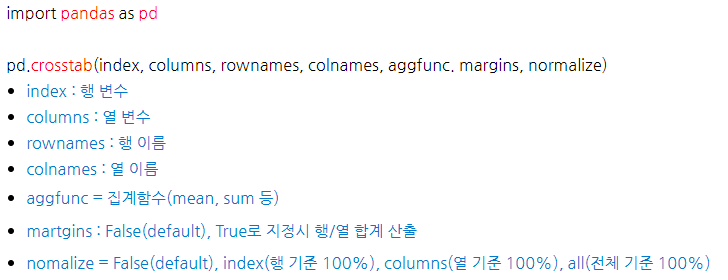

* 연령대(age_cat)와 행복도(happiness) 간 교차표 비중 

In [ ]:
pd.crosstab(df.age_cat, df.happiness, normalize = 'index')*100


happiness,very unhappy,unhappy,soso,happy
age_cat,,,,
20대,0.0,33.333333,66.666667,0.0
30대,20.0,20.000000,40.000000,20.0
40대 이상,0.0,33.333333,66.666667,0.0
